<a href="https://colab.research.google.com/github/syihabudin081/ml_terapan_dicoding/blob/main/Sistem_Rekomendasi_Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Anime Recommendation Content Based Filtering

## Data Collection


#### Sumber Dataset : https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

In [1]:
import pandas as pd

In [85]:
anime = pd.read_csv('/content/anime.csv')
anime_rating = pd.read_csv('/content/rating.csv')


## Data Understanding


In [86]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [87]:
anime_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


# Univariate Exploratory Data Analysis

In [88]:
print('Jumlah data judul anime: ', len(anime.anime_id.unique()))
print('Jumlah data genre anime: ', len(anime.genre.unique()))
print('Jumlah data user: ', len(anime_rating.user_id.unique()))

Jumlah data judul anime:  12294
Jumlah data genre anime:  3265
Jumlah data user:  73515


In [89]:
print('Jenis Genre ', anime.genre.unique())

Jenis Genre  ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']


In [90]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [91]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [92]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


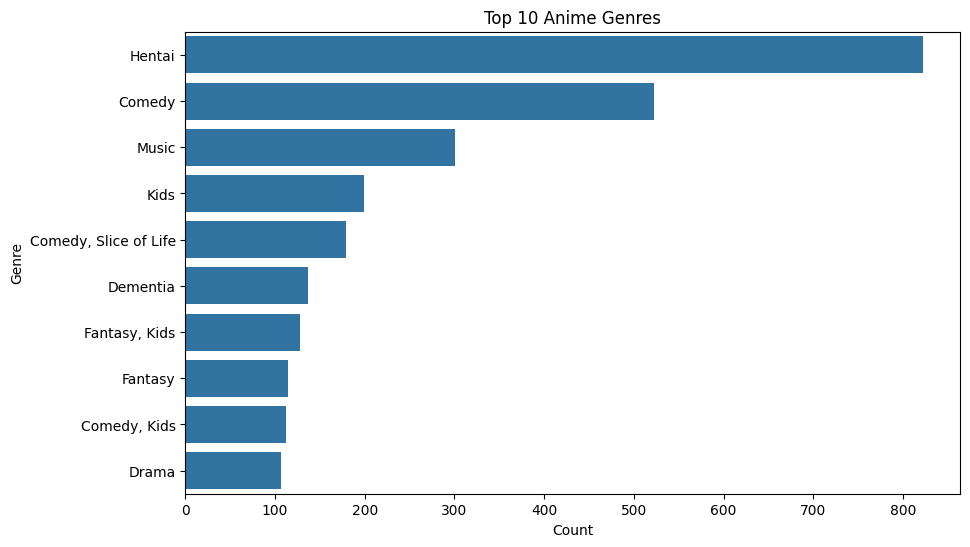

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=anime, order=anime['genre'].value_counts().index[:10])
plt.title('Top 10 Anime Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

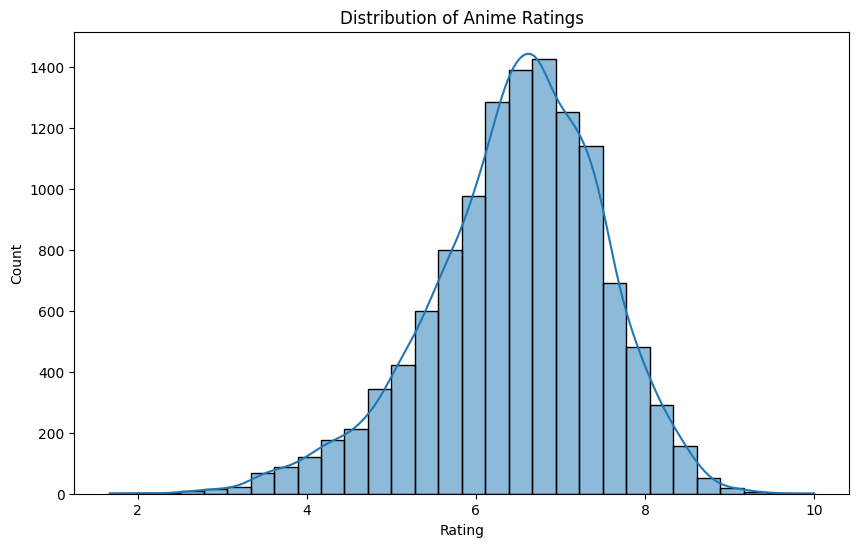

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(anime['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


<ipython-input-95-19b1f454d341>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(anime.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


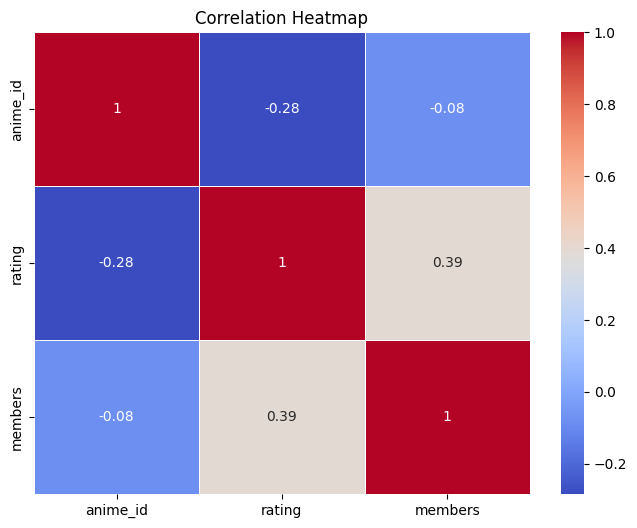

In [95]:
# Contoh grafik 6: Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(anime.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

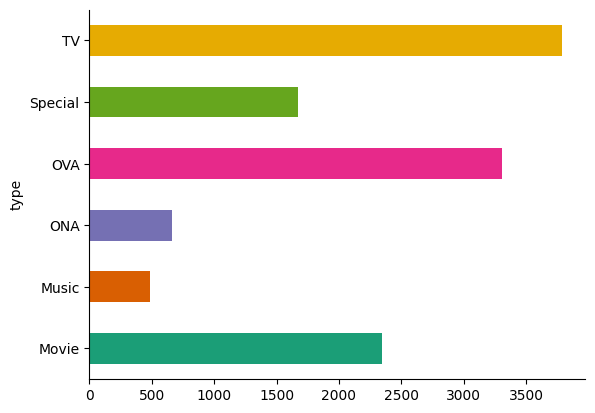

In [96]:
# @title type

from matplotlib import pyplot as plt
import seaborn as sns
anime.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

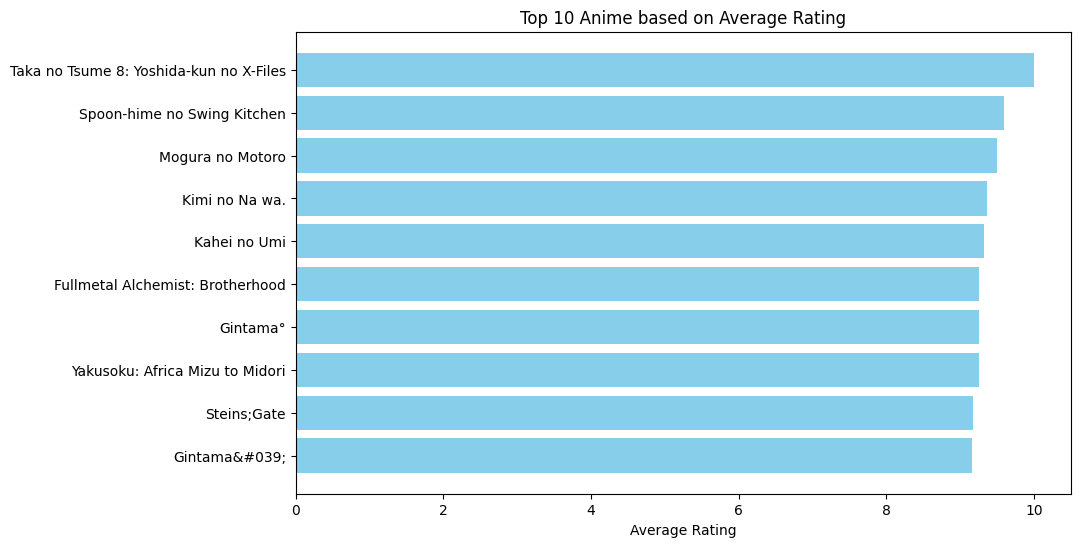

In [97]:
import matplotlib.pyplot as plt

# Kelompokkan data berdasarkan judul anime dan hitung rata-rata peringkat
average_ratings = anime.groupby('name')['rating'].mean().reset_index()

# Sortir dataframe berdasarkan peringkat rata-rata dari tinggi ke rendah
top_10_anime = average_ratings.sort_values(by='rating', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(top_10_anime['name'], top_10_anime['rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 10 Anime based on Average Rating')
plt.gca().invert_yaxis()  # Untuk mengurutkan dari rating tertinggi ke terendah
plt.show()


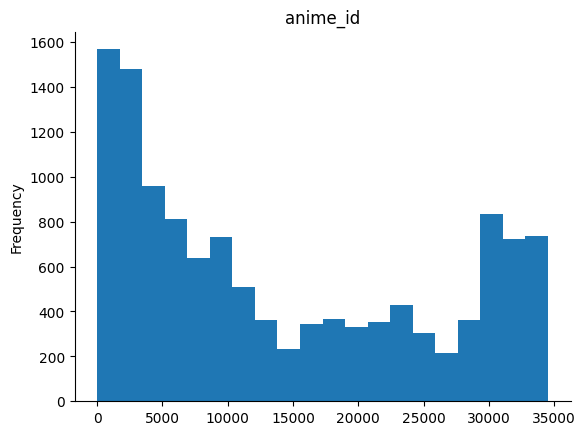

In [98]:
# @title anime_id

from matplotlib import pyplot as plt
anime['anime_id'].plot(kind='hist', bins=20, title='anime_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [99]:
anime_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [100]:
anime_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [101]:
anime_rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [102]:
import numpy as np

user_all = np.sort(np.unique(anime_rating))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  73516


In [103]:
# Count anime rating contribution
anime_rating_contribution = anime_rating.groupby('anime_id').count()
anime_rating_contribution.head(3)

,user_id,rating
anime_id,,
1,15509,15509
5,6927,6927
6,11077,11077


# Data Preprocessing

In [104]:
# Menggabungkan table anime rating contribution dengan dataframe anime berdasarkan anime_id
all_anime_name = pd.merge(anime_rating_contribution, anime[['anime_id','name','genre']], on='anime_id', how='left')
# Print dataframe all_anime_name
all_anime_name

,anime_id,user_id,rating,name,genre
0,1,15509,15509,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,6927,6927,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,11077,11077,Trigun,"Action, Comedy, Sci-Fi"
3,7,2629,2629,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna..."
4,8,413,413,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...,...,...
11195,34367,5,5,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports"
11196,34412,1,1,Hashiri Hajimeta bakari no Kimi ni,Music
11197,34475,4,4,Monster Strike: Rain of Memories,"Action, Fantasy, Game"
11198,34476,1,1,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life"


In [105]:
all_anime_name.sort_values(by='rating', ascending=False).head(10)

,anime_id,user_id,rating,name,genre
1389,1535,39340,39340,Death Note,"Mystery, Police, Psychological, Supernatural, ..."
6606,11757,30583,30583,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance"
7439,16498,29584,29584,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power"
1427,1575,27718,27718,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super..."
201,226,27506,27506,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,..."
4630,6547,27183,27183,Angel Beats!,"Action, Comedy, Drama, School, Supernatural"
10,20,25925,25925,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P..."
99,121,25032,25032,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag..."
3965,5114,24574,24574,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
3558,4224,24283,24283,Toradora!,"Comedy, Romance, School, Slice of Life"


In [106]:
anime_info_merged = all_anime_name

# Data Preparation

In [107]:
# Cek missing value dengan fungsi isnull()
anime_info_merged.isnull().sum()

anime_id     0
user_id      0
rating       0
name         3
genre       35
dtype: int64

In [108]:
# Membersihkan missing value dengan fungsi dropna()
anime_info_merged = anime_info_merged.dropna()
anime_info_merged

,anime_id,user_id,rating,name,genre
0,1,15509,15509,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,6927,6927,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,11077,11077,Trigun,"Action, Comedy, Sci-Fi"
3,7,2629,2629,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna..."
4,8,413,413,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...,...,...
11195,34367,5,5,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports"
11196,34412,1,1,Hashiri Hajimeta bakari no Kimi ni,Music
11197,34475,4,4,Monster Strike: Rain of Memories,"Action, Fantasy, Game"
11198,34476,1,1,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life"


In [109]:
anime_info_merged.isnull().sum()

anime_id    0
user_id     0
rating      0
name        0
genre       0
dtype: int64

In [110]:
# Mengurutkan anime berdasarkan anime id kemudian memasukkannya ke dalam variabel fix_anime
fix_anime = anime_info_merged.sort_values('anime_id', ascending=True)
fix_anime

,anime_id,user_id,rating,name,genre
0,1,15509,15509,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,6927,6927,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,11077,11077,Trigun,"Action, Comedy, Sci-Fi"
3,7,2629,2629,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna..."
4,8,413,413,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...,...,...
11195,34367,5,5,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports"
11196,34412,1,1,Hashiri Hajimeta bakari no Kimi ni,Music
11197,34475,4,4,Monster Strike: Rain of Memories,"Action, Fantasy, Game"
11198,34476,1,1,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life"


In [111]:
# Mengecek berapa jumlah fix_resto
len(fix_anime.anime_id.unique())

11165

In [112]:
fix_anime.genre.unique()

array(['Action, Adventure, Comedy, Drama, Sci-Fi, Space',
       'Action, Drama, Mystery, Sci-Fi, Space', 'Action, Comedy, Sci-Fi',
       ..., 'Comedy, Ecchi, Kids, Sci-Fi, Space', 'Shounen, Super Power',
       'Horror, Thriller'], dtype=object)

In [113]:
fix_anime['genre'].nunique()


3154

In [114]:
# Mengonversi data series ‘placeID’ menjadi dalam bentuk list
anime_id = fix_anime['anime_id'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
anime_name = fix_anime['name'].tolist()

# Mengonversi data series ‘Rcuisine’ menjadi dalam bentuk list
anime_genre = fix_anime['genre'].tolist()

print(len(anime_id))
print(len(anime_name))
print(len(anime_genre))

11165
11165
11165


In [115]:
anime_new = pd.DataFrame({
    'id': anime_id,
    'anime_name': anime_name,
    'genre': anime_genre
})
anime_new

,id,anime_name,genre
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Action, Comedy, Sci-Fi"
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna..."
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...
11160,34367,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports"
11161,34412,Hashiri Hajimeta bakari no Kimi ni,Music
11162,34475,Monster Strike: Rain of Memories,"Action, Fantasy, Game"
11163,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life"


In [116]:
data = anime_new
data.sample(5)

,id,anime_name,genre
2256,2466,Scramble Wars: Tsuppashire! Genom Trophy Rally,Parody
3680,4504,Kinkyuu Hasshin Saver Kids,"Action, Adventure, Comedy, Mecha, Sci-Fi"
10681,31980,Okusama ga Seitokaichou! OVA,"Comedy, Ecchi, Romance, Shounen"
8364,21037,Uchuu Icchokusen,"Fantasy, Mystery, Sci-Fi, Space"
8857,23251,Gugure! Kokkuri-san,"Comedy, Shounen, Supernatural"


# Modelling

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

In [118]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(11165, 47)

In [119]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.31590224, 0.34206953, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29959477, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.48872837, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.38181539, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [120]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.anime_name
).sample(22, axis=1).sample(10, axis=0)

,of,dementia,seinen,school,vampire,cars,game,kids,music,demons,...,slice,fi,super,martial,shounen,police,sci,hentai,adventure,parody
anime_name,,,,,,,,,,,,,,,,,,,,,
Binetsu: Yakusoku no Toki,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.0
Auction: Bijo Dorei,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.0
Tamayura,0.495853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.495853,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
Dan Doh!!,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.510459,0.0,0.000000,0.0,0.464592,0.0
Kyouryuu Boukenki Jura Tripper,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.450379,0.0,0.0,0.000000,0.0,0.450379,0.0,0.433391,0.0
Rurouni Kenshin Recap,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.316718,0.0
Baku Ane: Otouto Shibocchau zo! The Animation,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.0
Kid&#039;s Castle,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
Go! Go! Itsutsugo Land,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [121]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.77549792, 0.64637592, ..., 0.12061634, 0.28105069,
        0.25549712],
       [0.77549792, 1.        , 0.51723018, ..., 0.11438989, 0.26654232,
        0.        ],
       [0.64637592, 0.51723018, 1.        , ..., 0.18660401, 0.43480996,
        0.39527637],
       ...,
       [0.12061634, 0.11438989, 0.18660401, ..., 1.        , 0.        ,
        0.        ],
       [0.28105069, 0.26654232, 0.43480996, ..., 0.        , 1.        ,
        0.        ],
       [0.25549712, 0.        , 0.39527637, ..., 0.        , 0.        ,
        1.        ]])

In [122]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['anime_name'], columns=data['anime_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (11165, 11165)


anime_name,Himegoto,Umeboshi Denka: Uchuu no Hate kara Panparopan!,Clannad: After Story,Canvas 2: Niji-iro no Sketch,Hunter x Hunter: Greed Island Final
anime_name,,,,,
Shining Tears X Wind,0.000000,0.000000,0.147033,0.000000,0.289784
Jii Tousaku,0.000000,0.000000,0.000000,0.000000,0.000000
Haikyuu!! Movie 1: Owari to Hajimari,0.555304,0.284563,0.136389,0.230520,0.159668
Soliton no Akuma,0.000000,0.000000,0.146416,0.165775,0.000000
Orchid☆Emblem,0.000000,0.000000,0.000000,0.000000,0.000000
Takanashi Rikka Kai: Chuunibyou demo Koi ga Shitai! Movie,0.476223,0.244038,0.748355,0.912560,0.000000
Hwang-geum-ui Pal,0.000000,0.000000,0.000000,0.000000,0.219878
Wazaguu! vs. Dangerous Jiisan Ja: Houfukuzettou! Anime Quiz,0.271083,0.528998,0.000000,0.141466,0.000000
Thermae Romae,0.171110,0.333908,0.000000,0.089294,0.000000


In [123]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data[['anime_name', 'genre']], k=5):
    """
    Rekomendasi Anime berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_anime : tipe data string (str)
                Nama Anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_anime agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)


In [124]:
data[data.anime_name.eq('Tokyo Ghoul')]

,id,anime_name,genre
8625,22319,Tokyo Ghoul,"Action, Drama, Horror, Mystery, Psychological,..."


In [125]:
# Mendapatkan rekomendasi
anime_recommendations('Itazura na Kiss')

,anime_name,genre
0,Ore Monogatari!!,"Comedy, Romance, Shoujo"
1,Buddy Go! 2,"Comedy, Romance, Shoujo"
2,Kimi ni Todoke 2nd Season Specials,"Comedy, Romance, Shoujo"
3,Buddy Go!,"Comedy, Romance, Shoujo"
4,Aishite Knight,"Comedy, Romance, Shoujo"
